In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set_style("white")

In [13]:
s = pd.read_csv("substructures2.txt", delimiter="|", header=7)

In [14]:
ra_s = s["RA"]
dec_s = s["DEC"]
z_s = s["Redshift"]

In [15]:
hc = pd.read_csv("tables_photometric/Hydra-Centaurus-Gaia-Crossmatch.csv", 
                    usecols=["RA_2", "DEC_2", "PROB_GAL", "zml", "r_petro", "g_petro"])

In [16]:
ra = hc["RA_2"]
dec = hc["DEC_2"]
probgal = hc["PROB_GAL"]
zml = hc["zml"]
rpetro = hc["r_petro"]
gpetro = hc["g_petro"]

In [17]:
mask = (rpetro > 11) & (rpetro < 21) & (zml > 0.005) & (zml < 0.2) & (probgal > 0.8)

mask_s = (ra_s < 185) & (ra_s > 148) & (z_s < 0.1)

In [18]:
#Defining the center of Hydra (in degress)
ra_0 = 159.17
dec_0 = -27.524

#Defining the radius of 1R200 around the center (in degrees)
#R200 = 1.4Mpc + scale of 0.247 Kpc/" ==> radius = 1.5744º
radius = 1.5744

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


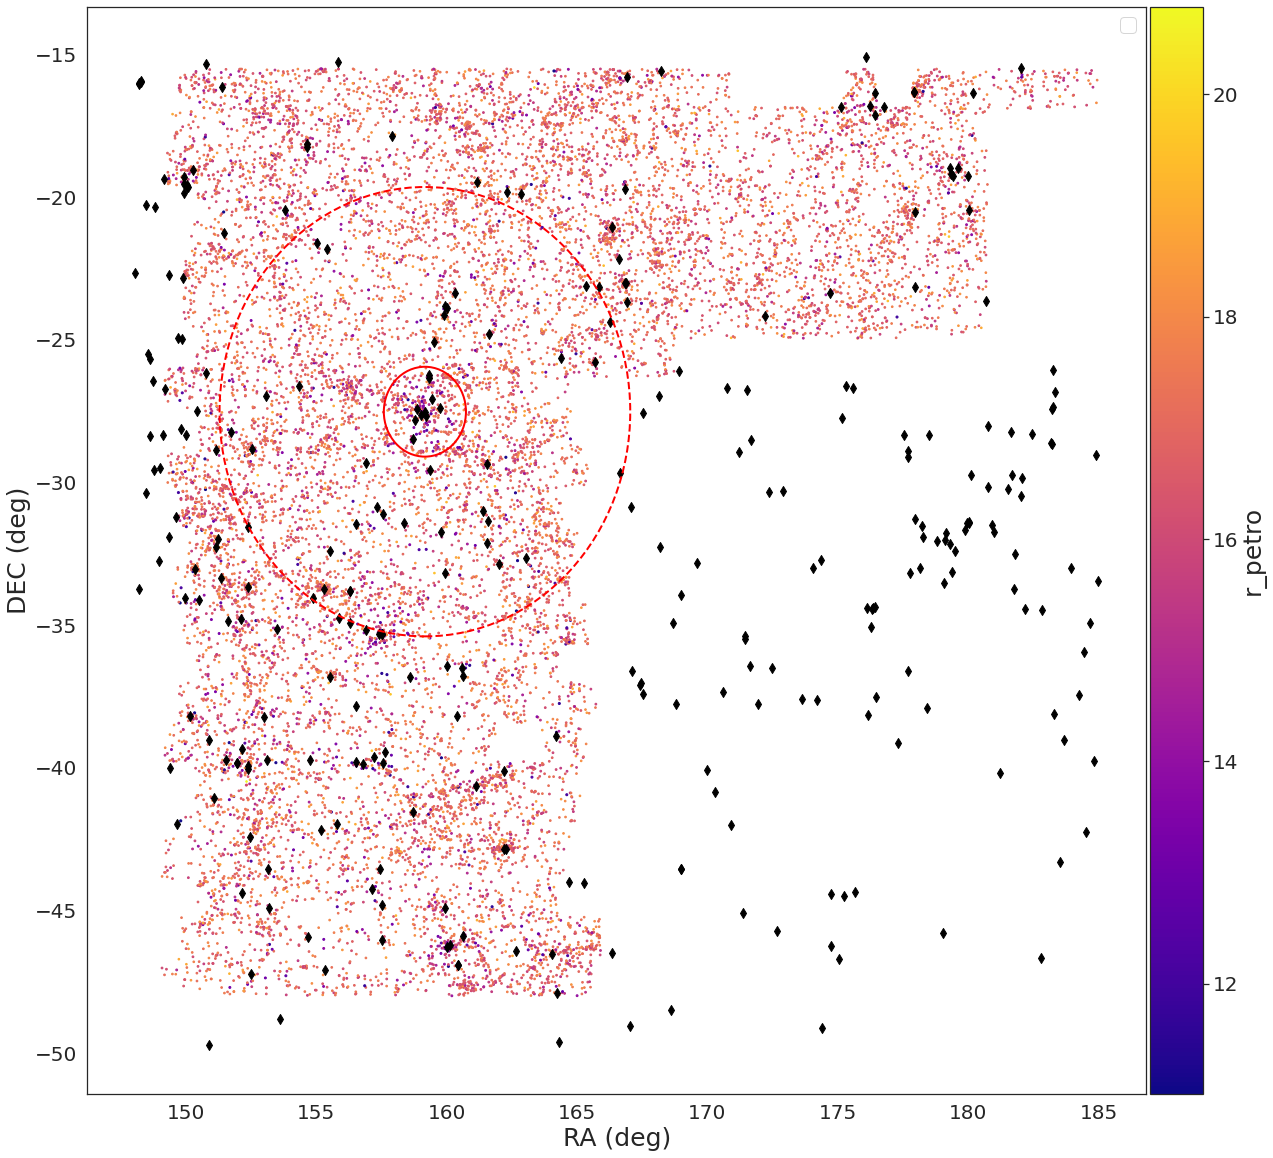

In [19]:
fontsize = 25
labelsize = 20

from mpl_toolkits.axes_grid1 import make_axes_locatable
cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('plasma')

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)

sc1 = ax.scatter(x=ra[mask], y=dec[mask], c=rpetro[mask], cmap=cm2, s=(1/rpetro[mask])*50)
ax.set_ylabel("DEC (deg)", fontsize=fontsize)
ax.set_xlabel("RA (deg)", fontsize=fontsize)

ax.scatter(x=ra_s[mask_s], y=dec_s[mask_s], s=50, cmap=cm2, color="black", marker="d")

divider = make_axes_locatable(ax)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="r_petro", fontsize=fontsize)
cbar.ax.tick_params(labelsize=labelsize)

ax.legend(fontsize=fontsize*0.8)
ax.xaxis.set_tick_params(labelsize=20, width=35)
ax.yaxis.set_tick_params(labelsize=20, width=35)

FiveR200 = plt.Circle((ra_0, dec_0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
ax.add_patch(FiveR200)

OneR200 = plt.Circle((ra_0, dec_0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
ax.add_patch(OneR200)